In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from matplotlib import colors
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Задание 1.

In [2]:
# Загружаем тестовый датасет в виде датафрейма и выводим его описание.
iris = load_iris(as_frame=True)
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
# Инициализируем датафрейм из загруженного датасета.
iris_data = iris.data
iris_class = iris.target
display(iris_data)
display(iris_class)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

# Задание 2.

In [4]:
# Забираем нужные признаки.
iris_data_ = iris_data[['sepal length (cm)', 'sepal width (cm)']]
iris_data_

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


# Задание 3.

In [5]:
# Делим данные на выборку для обучения и тестирования.
x_train, x_test, y_train, y_test = train_test_split(iris_data_, iris_class, test_size=0.3)

# Задание 4.

In [6]:
# Создаём и учим модель.
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [7]:
# Прогнозируем.
lda.predict(x_test)

array([1, 1, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 2, 2, 2, 1, 0, 0, 2, 0, 2, 1,
       0, 1, 1, 0, 1, 2, 0, 2, 1, 1, 2, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 0,
       1])

In [8]:
# Результат каждый раз оказывается различным, но в основном всегда больше 0.7.
accuracy_score(y_test, lda.predict(x_test))

0.8222222222222222

# Задание 5.

In [9]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

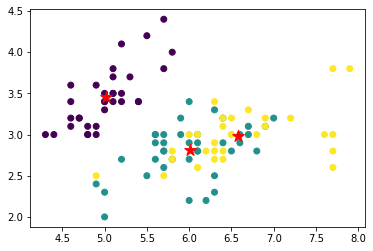

In [10]:
plt.scatter(x_train['sepal length (cm)'], x_train['sepal width (cm)'], c=y_train)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.show()

# Задание 6 и 7.

In [11]:
# Судя по всему нет необходимости переводить величины в относительные,
# но для практики выполним скалирование.
scaler = StandardScaler()

In [12]:
# Преобразуем данные и обучаем модель.
iris_scaled = scaler.fit_transform(iris_data_)

In [13]:
# Попробуем определить оптимальное количество кластеров.
k_inertia = []
ks = range(1, 20)
for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(iris_scaled)
    k_inertia.append(clf_kmeans.inertia_)

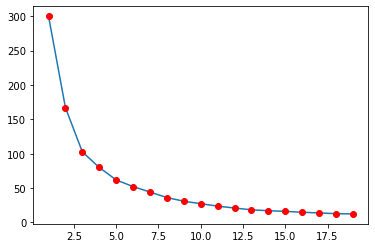

In [14]:
# Рисуем график "локтя".
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Предполагаем, что "локоть" наблюдается при числе кластеров равном 3. Это нам подходит и соответсвует описанию датасета, где сказано, что у нас всего 3 типа ирисов. Будем делить на 3 кластера.

In [15]:
# Выполняем кластеризацию методом k-средних.
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(iris_scaled)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [16]:
accuracy_score(iris.target, clusters)

0.21333333333333335

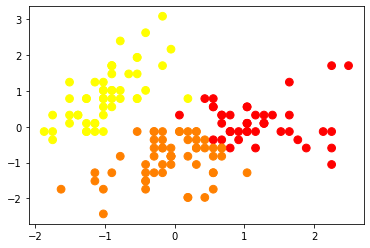

In [16]:
plt.scatter(iris_scaled[:, 0], iris_scaled[:, 1], cmap='autumn', c=clusters, s=60)

# Вывод.
В ходе проделанной работы была выполнена классификация и кластеризация на основе датасета для обучения.

При классификации точность сделанных прогнозов при заданных параметрах соотвествовала ~80%, что в целом неплохо.

При кластеризации мы изначально определили, что оптимальное число кластеров равно трём, то есть числу равному количеству классов цветов ириса в использованном датасете. По итогу была выполнена проверка точности кластеризации относительно реальных данных. Результат оказался низким (порядка ~20%), что вероятно может быть как плохо, так и в целом подобающе, в виду того, что алгоритм не обучался на реальных данных, а делал вывод по той информации, которая у него была, и ещё вероятно потому что использовались только два признака цветка.